# 1. Introduction To The Data
Instructions
Create a scatter plot with year on the x-axis and lean on the y-axis.
Hint
plt.scatter(x,y) will create a scatter plot.

      lean  year
0   2.9642  1975
1   2.9644  1976
2   2.9656  1977
3   2.9667  1978
4   2.9673  1979
5   2.9688  1980
6   2.9696  1981
7   2.9698  1982
8   2.9713  1983
9   2.9717  1984
10  2.9725  1985
11  2.9742  1986
12  2.9757  1987


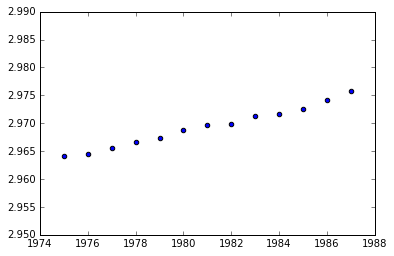

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

pisa = pd.DataFrame({"year":range(1975, 1988),
                    "lean":[2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696,
                           2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})

print(pisa)

plt.scatter(pisa["year"], pisa["lean"])

# 2. Fit The Linear Model
Instructions
linearfit contains the fitted linear model to our data. Print the summary of the model by using the method .summary().
Don't worry about understanding all of the summary, we will cover many of the statistics in the following screens.
Hint
Wrap the .summary() in a print statement.

In [2]:
import statsmodels.api as sm

y = pisa.lean # target
X = pisa.year # features
X = sm.add_constant(X)

linear = sm.OLS(y, X)
linearfit = linear.fit()

print(linearfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           6.50e-12
Time:                        19:58:03   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

//anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


# 3. Define A Basic Linear Model
Instructions Using linearfit with data X and y predict the residuals.
Residuals are computed by subtracting the observed values from the predicted values.
Assign the residuals to variable residuals.
Hint
Residuals are found by subtracting the prediction by the observed value.

In [3]:
yhat = linearfit.predict(X)
print(yhat)

[ 2.96377802  2.96470989  2.96564176  2.96657363  2.96750549  2.96843736
  2.96936923  2.9703011   2.97123297  2.97216484  2.9730967   2.97402857
  2.97496044]


In [4]:
residuals = y - yhat
print(residuals)

0     0.000422
1    -0.000310
2    -0.000042
3     0.000126
4    -0.000205
5     0.000363
6     0.000231
7    -0.000501
8     0.000067
9    -0.000465
10   -0.000597
11    0.000171
12    0.000740
Name: lean, dtype: float64


# 4. Histogram Of Residuals
Instructions Create a histogram with 5 bins of the residuals using matplotlib's hist() function.
The bins parameter allows us to specify the number of bins.
Hint
plt.hist(x) plots a histogram.

(array([ 3.,  2.,  4.,  3.,  1.]),
 array([ -5.96703297e-04,  -3.29450549e-04,  -6.21978022e-05,
          2.05054945e-04,   4.72307692e-04,   7.39560440e-04]),
 <a list of 5 Patch objects>)

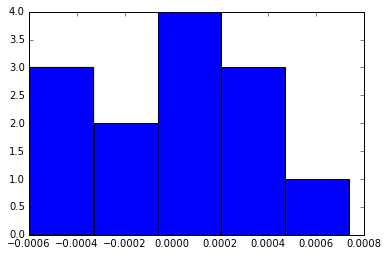

In [5]:
plt.hist(residuals, bins=5)

# 5. Sum Of Squares
Instructions Compute the RSS and TSS for our model, linearfit, using the formulas above.
Assign the RSS to variable RSS and the TSS to variable TSS.
Hint
Use formulas above and follow the example shown.

In [6]:
import numpy as np

ybar = np.mean(y.values)

SSE = np.sum((y.values-yhat)**2)
SSR = np.sum((ybar-yhat)**2)
SST = np.sum((ybar-y.values)**2)

print(SSE)
print(SSR)
print(SST)

1.92285714286e-06
0.000158044835165
0.000159967692308


# 7. R-Squared
Instructions Compute the R-Squared for our model, linearfit. Assign the R-squared to variable R2.
Hint
Use RSS and TSS that we calculated in the previous screen.

In [7]:
R2 = SSR/SST
print(R2)

0.987979715684


In [8]:
R2 = 1- (SSE/SST)
print(R2)

0.987979715684


In [9]:
print(linearfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           6.50e-12
Time:                        19:58:03   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

//anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [10]:
print("\n",linearfit.params)


 const    1.123338
year     0.000932
dtype: float64


In [11]:
delta = linearfit.params*15
print(delta)

const    16.850077
year      0.013978
dtype: float64


# 8. Variance Of Coefficients
Instructions
Compute s2(β1^)
s
2
(
β
1
^
)
 for linearfit.
Assign this variance to variable s2b1.
Hint
The mean year can be found by using .mean() on column year.

In [12]:
SSE = ((y.values - yhat)**2)
xvar = np.sum((pisa.year - pisa.year.mean())**2)
s2b1 = SSE / ((y.shape[0] - 2) * xvar)
print(s2b1)

[  8.89437817e-11   4.79679721e-11   8.71004372e-13   7.97716956e-12
   2.10929030e-11   6.56872412e-11   2.66006183e-11   1.25424630e-10
   2.24446487e-12   1.07927937e-10   1.77849563e-10   1.46791984e-11
   2.73201620e-10]


# 9. T-Distribution
Instructions Make a plot comparing 2 pdfs of the t-distribution with different degrees of freedom.
With the x variable given, compute the pdf with 3 degrees of freedom and assign it to variable tdist3.
Then compute a similar pdf with 30 degrees of freedom and assign it to variable tdist30.
On a single plot, plot x on the x-axis for both tdist3 and tdist30 on the y-axis.
Hint
First plot x and tdist3 then plot x and tdist30 using plt.plot().

In [17]:
from scipy.stats import t

x = np.linspace(-3,3,100)

print(t.pdf(x=x, df=3))

[ 0.02297204  0.02441481  0.02596406  0.02762847  0.0294174   0.031341
  0.03341025  0.03563701  0.03803403  0.04061509  0.04339497  0.04638952
  0.04961567  0.05309149  0.05683617  0.06086996  0.0652142   0.06989116
  0.07492395  0.08033633  0.08615245  0.09239652  0.0990924   0.10626304
  0.11392986  0.12211193  0.13082504  0.14008063  0.14988449  0.16023537
  0.17112343  0.18252859  0.1944188   0.20674834  0.21945618  0.23246464
  0.2456783   0.2589835   0.27224841  0.28532401  0.29804594  0.31023748
  0.32171351  0.33228555  0.34176766  0.34998293  0.35677032  0.36199128
  0.36553585  0.36732769  0.36732769  0.36553585  0.36199128  0.35677032
  0.34998293  0.34176766  0.33228555  0.32171351  0.31023748  0.29804594
  0.28532401  0.27224841  0.2589835   0.2456783   0.23246464  0.21945618
  0.20674834  0.1944188   0.18252859  0.17112343  0.16023537  0.14988449
  0.14008063  0.13082504  0.12211193  0.11392986  0.10626304  0.0990924
  0.09239652  0.08615245  0.08033633  0.07492395  0.06

In [23]:
tdist3 = t.pdf(x=x, df=3)

In [22]:
tdist30 = t.pdf(x=x, df=30)

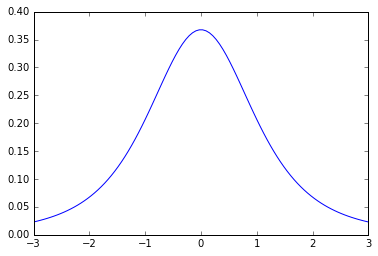

In [31]:
plt.plot(x, tdist3)

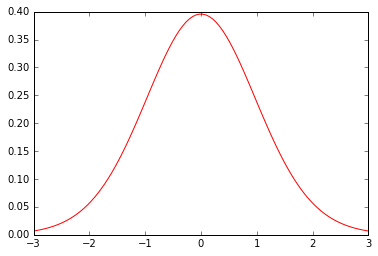

In [27]:
plt.plot(x, tdist30, color='r')

# 10. Statistical Significance Of Coefficients
Instructions Using the formula above, compute the t-statistic of β1
.
Assign the t-statistic to variable tstat.
Hint
Divide \hat{\beta_1} by \sqrt{s^2(\hat{\beta_1})}.


In [35]:
tstat = linearfit.params["year"] / np.sqrt(s2b1)
print(tstat)

[  98.8090365   134.54847525  998.49131685  329.93626095  202.90197872
  114.97778792  180.67938101   83.20760969  622.01098364   89.6989835
   69.87600372  243.22224366   56.37841013]


# 13. The P-Value
Instructions Do we accept β1>0?
Assign the boolean value, True or False, to variable beta1_test.
Hint
Is pval less than p?
    

In [37]:
pval = 0.975
df = pisa.shape[0] - 2
p = t.cdf(tstat, df=df)

In [43]:
beta1_test = p > pval
print(beta1_test)    

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
